# Load and Explore the Dataset

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection
from sklearn.model_selection import train_test_split as split

In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline
sns.set(style="whitegrid", color_codes=True)

In [3]:
filename = 'assignment04.csv.txt'
df = pd.read_csv(filename, encoding='utf-16', sep='\t')
df.shape

(303, 14)

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.320132,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.592299,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# Data Visualization

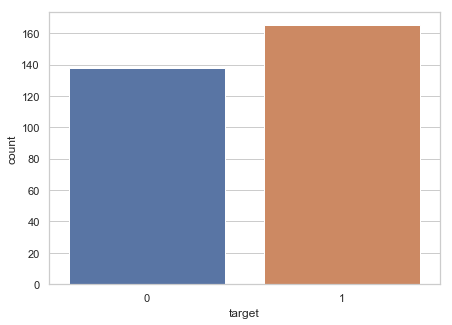

In [6]:
fig, ax = plt.subplots(figsize=[7, 5])
sns.countplot(x = "target", data = df)

In [7]:
df['target'].value_counts()
#count of people having heart disease is apriximately same as not having heart disease

1    165
0    138
Name: target, dtype: int64

Those are having heart disease among them no of male are aproximately same as females

In [8]:
categorial = [('sex', ['female', 'male']), 
              ('cp', ['typical angina', 'atypical angina', 'non-anginal pain', 'asymptomatic']), 
              ('fbs', ['fbs > 120mg', 'fbs <= 120mg']), 
              ('restecg', ['normal', 'ST-T wave', 'left ventricular']), 
              ('exang', ['yes', 'no']), 
              ('slope', ['downsloping','upsloping', 'flat']), 
              ('ca', ['0','1', '2','3','4']), 
              ('thal', ['normal', 'fixed defect', 'reversible defect'])]
continuous = [('trestbps', 'blood pressure in mm Hg'), 
              ('chol', 'serum cholestoral in mg/d'), 
              ('thalach', 'maximum heart rate achieved'), 
              ('oldpeak', 'ST depression by exercise relative to rest')]


def plotAge():
    facet_grid = sns.FacetGrid(df, hue='target')
    facet_grid.map(sns.kdeplot, "age", shade=True, ax=axes[0])
    legend_labels = ['disease false', 'disease true']
    for t, l in zip(axes[0].get_legend().texts, legend_labels):
        t.set_text(l)
        axes[0].set(xlabel='age', ylabel='density')

    avg = df[["age", "target"]].groupby(['age'], as_index=False).mean()
    sns.barplot(x='age', y='target', data=avg, ax=axes[1])
    axes[1].set(xlabel='age', ylabel='disease probability')

    plt.clf()
        
def plotCategorial(attribute, labels, ax_index):
    sns.countplot(x=attribute, data=df, ax=axes[ax_index][0])
    sns.countplot(x='target', hue=attribute, data=df, ax=axes[ax_index][1])
    avg = df[[attribute, 'target']].groupby([attribute], as_index=False).mean()
    sns.barplot(x=attribute, y='target', hue=attribute, data=avg, ax=axes[ax_index][2])
    
    for t, l in zip(axes[ax_index][1].get_legend().texts, labels):
        t.set_text(l)
    for t, l in zip(axes[ax_index][2].get_legend().texts, labels):
        t.set_text(l)


def plotContinuous(attribute, xlabel, ax_index):
    sns.distplot(df[[attribute]], ax=axes[ax_index][0])
    axes[ax_index][0].set(xlabel=xlabel, ylabel='density')
    sns.boxplot(x='target', y=attribute, data=df, ax=axes[ax_index][1])
    
    
def plotGrid(isCategorial):
    if isCategorial:
        [plotCategorial(x[0], x[1], i) for i, x in enumerate(categorial)] 
    else:
        [plotContinuous(x[0], x[1], i) for i, x in enumerate(continuous)] 

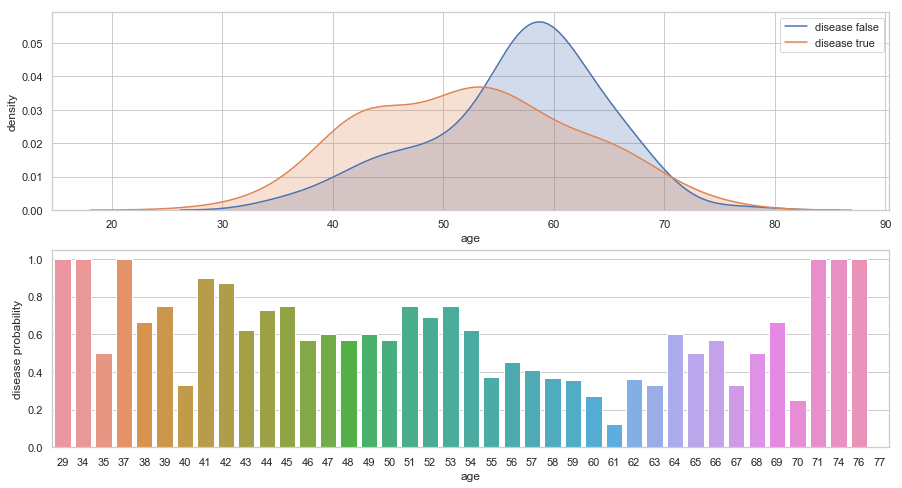

<Figure size 216x216 with 0 Axes>

In [9]:
fig_age, axes = plt.subplots(nrows=2, ncols=1, figsize=(15, 8))

plotAge()

Observations

age has a symmetric and unimodal distribution, where for both target outcomes, the data seems to be centered around 40 to 70 years old

Respondents with a heart disease peak between 40 and 65 years, with the highest density

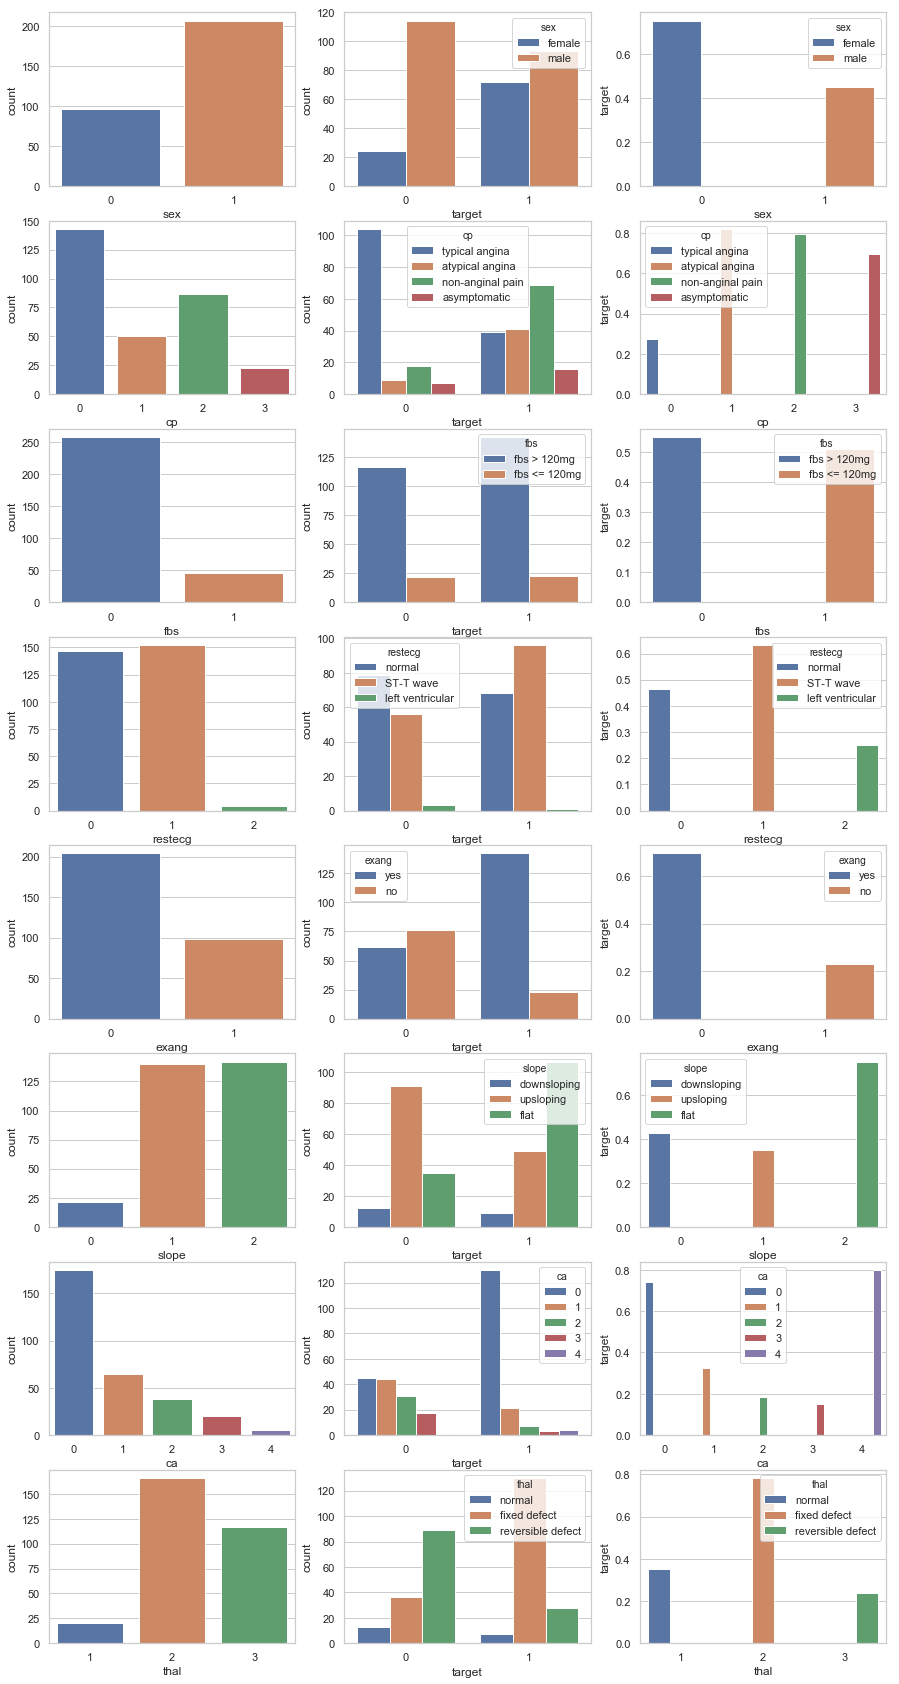

In [10]:
fig_categorial, axes = plt.subplots(nrows=len(categorial), ncols=3, figsize=(15, 30))

plotGrid(isCategorial=True)

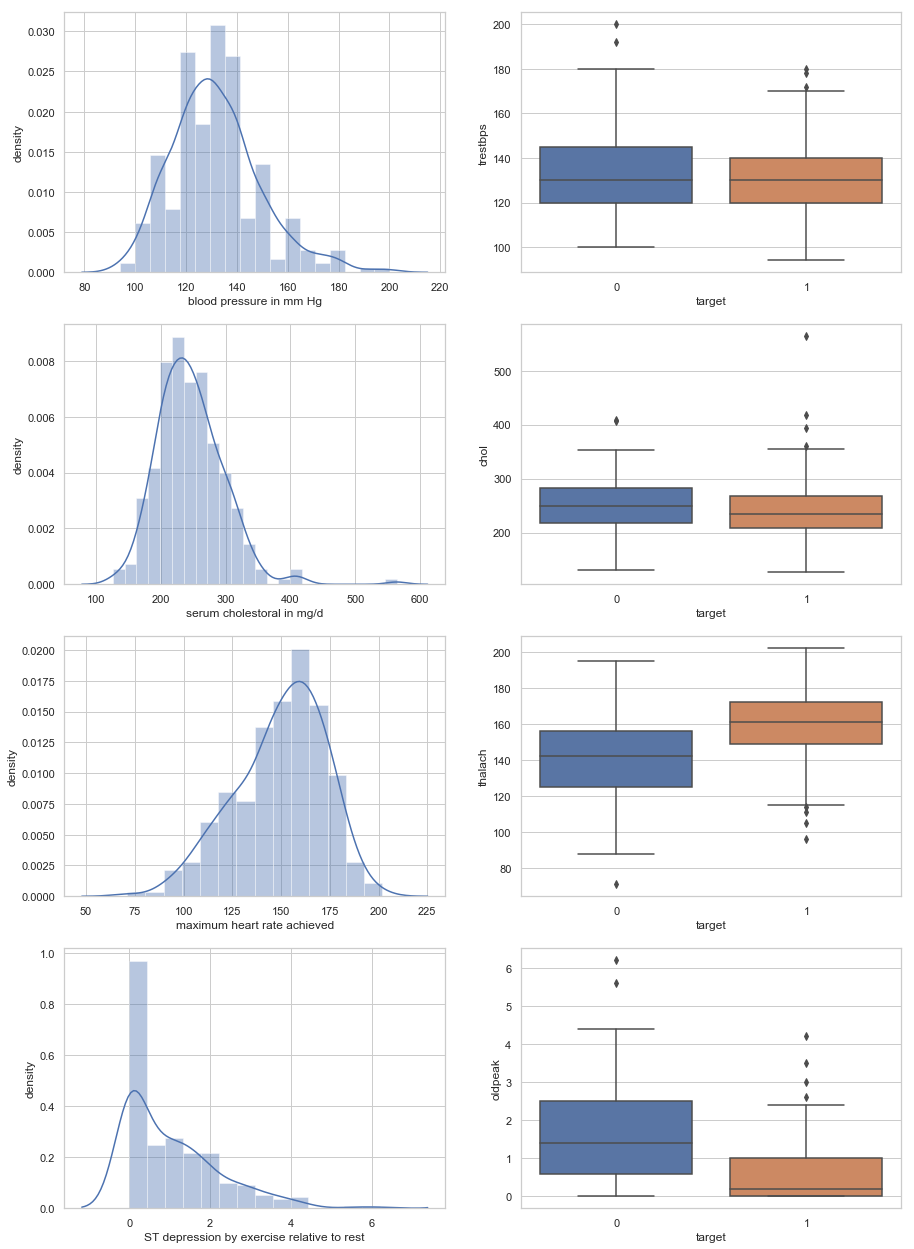

In [11]:
fig_continuous, axes = plt.subplots(nrows=len(continuous), ncols=2, figsize=(15, 22))

plotGrid(isCategorial=False)

# Modeling

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score

from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [13]:
filename = 'assignment04.csv.txt'
df = pd.read_csv(filename, encoding='utf-16', sep='\t')
df.shape

(303, 14)

In [14]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

X = df.iloc[:,0:13].values
y = df.iloc[:,13].values

#nurmalize the data
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)
dfNorm = pd.DataFrame(X_std, index=df.index, columns=df.columns[0:13])
# # add non-feature target column to dataframe
dfNorm['target'] = df['target']
dfNorm.head(10)
X = dfNorm.iloc[:,0:13].values
y = dfNorm.iloc[:,13].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
X_train.shape, y_train.shape, X_test.shape , y_test.shape

((212, 13), (212,), (91, 13), (91,))

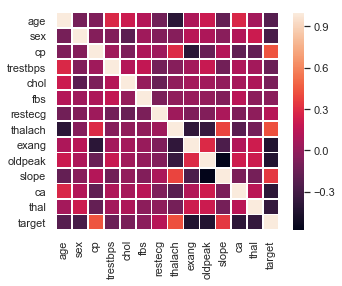

In [15]:
# # calculate the correlation matrix
corr = dfNorm.corr()

# plot the heatmap
fig = plt.figure(figsize=(5,4))
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
            linewidths=.75)

In [16]:
models = [DecisionTreeClassifier(random_state=100), 
          RandomForestClassifier(random_state=100,n_estimators=300),
          LogisticRegression(random_state=100),
          LinearDiscriminantAnalysis()]

for i in models:
    model = i
    model.fit(X_train,y_train)
    pred = model.predict(X_test)
    acc_score = accuracy_score(pred, y_test)
    print('The accuracy for',i,'is',acc_score*100)

The accuracy for DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best') is 72.52747252747253
The accuracy for RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=None,
            oob_score=False, random_state=100, verbose=0, warm_start=False) is 82.41758241758241
The accuracy for LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
    

In [17]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
def sfs_features(algo_namem,features_nums):
    sfs_name=SFS(algo_namem, 
                k_features=features_nums, 
                forward=True, 
                floating=False,
                scoring='accuracy',
                cv=5)
    return sfs_name

In [18]:
results_test = {}
results_train = {}
list_algos=[]

In [19]:
def prdict_date(algo_name,X_train,y_train,X_test,y_test,atype='',verbose=0):
    algo_name.fit(X_train, y_train)
    Y_pred = algo_name.predict(X_test)
    acc_train = round(algo_name.score(X_train, y_train) * 100, 2)
    acc_val = round(algo_name.score(X_test, y_test) * 100, 2)
    
    results_test[str(algo_name)[0:str(algo_name).find('(')]+'_'+str(atype)] = acc_val
    results_train[str(algo_name)[0:str(algo_name).find('(')]+'_'+str(atype)] = acc_train
    list_algos.append(str(algo_name)[0:str(algo_name).find('(')])
    if verbose ==0:
        print("acc train: " + str(acc_train))
        print("acc test: "+ str(acc_val))
    else:
        return Y_pred

In [20]:
def print_fitures(sfs_name='sfs1',verbose=0):
    a= (sfs_name.k_feature_idx_[0],sfs_name.k_feature_idx_[1],sfs_name.k_feature_idx_[2])
    if verbose ==0:
        print('Selected features:', sfs_name.k_feature_idx_)
        for i in range (len (sfs_name.k_feature_idx_)):
            print (df.iloc[:,sfs_name.k_feature_idx_[i]].name)
    return a

In [21]:
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold
from scipy import interp

def roc_graph_cv(algo_name,X,y,cvn=5):
    # Run classifier with cross-validation and plot ROC curves
    cv = StratifiedKFold(n_splits=cvn)
    classifier =algo_name
    plt.figure(figsize=(5,4))
    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)

    i = 0
    for train, test in cv.split(X, y):
        probas_ = classifier.fit(X[train], y[train].ravel()).predict_proba(X[test])
        # Compute ROC curve and area the curve
        fpr, tpr, thresholds = roc_curve(y[test].ravel(), probas_[:, 1])
        tprs.append(interp(mean_fpr, fpr, tpr))
        tprs[-1][0] = 0.0
        roc_auc = auc(fpr, tpr)
        aucs.append(roc_auc)
        plt.plot(fpr, tpr, lw=1, alpha=0.3,
                 label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

        i += 1
    plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
             label='Luck', alpha=.8)

    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    
    plt.plot(mean_fpr, mean_tpr, color='b',
             label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
             lw=2, alpha=.8)

    std_tpr = np.std(tprs, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                     label=r'$\pm$ 1 std. dev.')

    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

In [22]:
def conf(algo_name,X_test, y_test):
    y_pred = algo_name.predict(X_test)
    forest_cm = metrics.confusion_matrix(y_pred, y_test, [1,0])
    plt.figure(figsize=(5,4))
    sns.heatmap(forest_cm, annot=True, fmt='.2f',xticklabels = ["1", "0"] , yticklabels = ["1", "0"] )
    plt.ylabel('True class')
    plt.xlabel('Predicted class')
    plt.title(str(algo_name)[0:str(algo_name).find('(')])

In [23]:
### LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
prdict_date(lda,X_train,y_train,X_test,y_test)

acc train: 86.32
acc test: 80.22


In [24]:
#predictusing sfs:
sfs_1=sfs_features(lda,(1,5))
sfs_1 = sfs_1.fit(X, y)
selectedFeatures = print_fitures(sfs_1)

#plot3D(sfs_1.k_feature_idx_[0],sfs_1.k_feature_idx_[1],sfs_1.k_feature_idx_[2],'knn')

X_train_sfs = sfs_1.transform(X_train)
X_test_sfs = sfs_1.transform(X_test)
print ('\n')
prdict_date(lda,X_train_sfs,y_train,X_test_sfs,y_test,'sfs')

Selected features: (2, 7, 9, 10, 12)
cp
thalach
oldpeak
slope
thal


[[ 0.03203122 -0.42186226 -0.89686172  0.97635214 -0.54138434]
 [ 1.97312292 -0.81543681 -0.81059216 -0.64911323 -0.54138434]
 [-0.93851463 -0.50932327  0.74225984  0.97635214  1.14974406]
 ...
 [ 1.97312292  0.54020884  0.74225984 -0.64911323  1.14974406]
 [ 1.00257707  0.27782582 -0.89686172  0.97635214 -0.54138434]
 [ 0.03203122  0.45274783  0.65599028 -0.64911323 -0.54138434]]
acc train: 81.13
acc test: 80.22


              precision    recall  f1-score   support

           0       0.86      0.70      0.78        44
           1       0.76      0.89      0.82        47

   micro avg       0.80      0.80      0.80        91
   macro avg       0.81      0.80      0.80        91
weighted avg       0.81      0.80      0.80        91



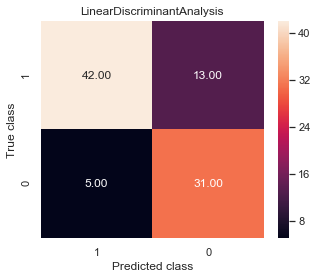

In [25]:
print(classification_report(y_test, lda.predict(X_test_sfs)))
conf(lda,X_test_sfs, y_test)

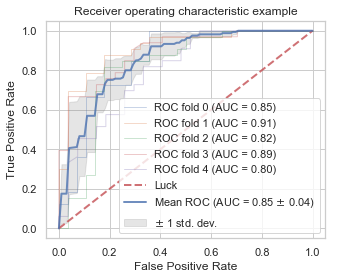

In [26]:
roc_graph_cv(lda,X[:,selectedFeatures],y)

In [27]:
# RANDOM FOREST
random_forest = RandomForestClassifier(n_estimators=50, random_state = 0)
prdict_date(random_forest,X_train,y_train,X_test,y_test)

acc train: 100.0
acc test: 83.52


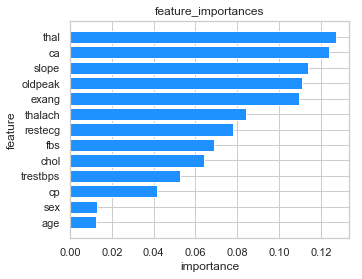

In [28]:
feature_importance = random_forest.feature_importances_
feat_importances = pd.Series(random_forest.feature_importances_, index=df.columns[:-1])
feat_importances = feat_importances.nlargest(13)

feature = df.columns.values.tolist()[0:-1]
importance = sorted(random_forest.feature_importances_.tolist())


x_pos = [i for i, _ in enumerate(feature)]
plt.figure(figsize=(5,4))
plt.barh(x_pos, importance , color='dodgerblue')
plt.ylabel("feature")
plt.xlabel("importance")
plt.title("feature_importances")

plt.yticks(x_pos, feature)

plt.show()

In [29]:
#taking the best 5 features give as smaller result.
currlist =[2,12,11,10,9]
# print (currlist)

random_forest = RandomForestClassifier(n_estimators=100, random_state = 0)
prdict_date(random_forest,X_train[:,currlist],y_train,X_test[:,currlist],y_test,'FS')

acc train: 94.81
acc test: 84.62


In [30]:
sfs_1=sfs_features(random_forest,(1,5))
sfs_1 = sfs_1.fit(X, y)
selectedFeatures = print_fitures(sfs_1)


X_train_sfs = sfs_1.transform(X_train)
X_test_sfs = sfs_1.transform(X_test)

print ("\n")
prdict_date(random_forest,X_train_sfs,y_train,X_test_sfs,y_test,'sfs')

Selected features: (2, 11, 12)
cp
ca
thal


acc train: 86.32
acc test: 81.32


              precision    recall  f1-score   support

           0       0.85      0.75      0.80        44
           1       0.79      0.87      0.83        47

   micro avg       0.81      0.81      0.81        91
   macro avg       0.82      0.81      0.81        91
weighted avg       0.82      0.81      0.81        91



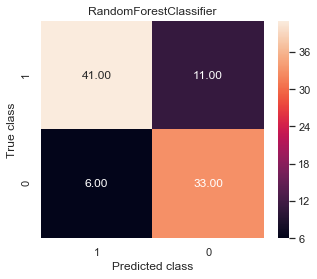

In [31]:
print(classification_report(y_test, random_forest.predict(X_test_sfs)))
conf(random_forest,X_test_sfs, y_test)

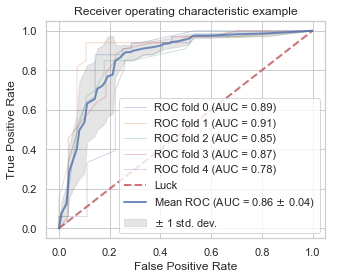

In [32]:
roc_graph_cv(random_forest,X[:,selectedFeatures],y)